In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [8]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [9]:
pd.options.display.float_format = '{:.2f}'.format

# Importing the dataset

In [10]:
df = pd.read_csv(r"C:\Users\jaska\OneDrive\jupyterProjects\covid19_timeseries\covid_19_data.csv")

In [11]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [12]:
df.shape

(172480, 8)

In [13]:
df.rename(columns={'ObservationDate':'Date'}, inplace=True)
df.rename(columns={'Province/State':'Province'}, inplace=True)
df.rename(columns={'Country/Region':'Country'}, inplace=True)

In [14]:
df.head()

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


# Data Analysis

In [ ]:
# we just need date , confirmed, deaths, recovered columns for the scope of this project

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          172480 non-null  int64  
 1   Date         172480 non-null  object 
 2   Province     124597 non-null  object 
 3   Country      172480 non-null  object 
 4   Last Update  172480 non-null  object 
 5   Confirmed    172480 non-null  float64
 6   Deaths       172480 non-null  float64
 7   Recovered    172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [16]:
df.isnull().sum()

SNo                0
Date               0
Province       47883
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [27]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.00,172480.00,172480.00,172480.00
mean,86240.50,33231.56,1050.03,21028.25
std,49790.83,103134.89,3499.44,115659.79
min,1.00,-302844.00,-178.00,-854405.00
25%,43120.75,457.00,6.00,10.00
50%,86240.50,4016.50,76.00,858.00
75%,129360.25,18843.00,554.00,7229.00
max,172480.00,2290891.00,54804.00,5624444.00


In [17]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [30]:
confirmed

,Date,Confirmed
0,01/22/2020,555.00
1,01/23/2020,653.00
2,01/24/2020,941.00
3,01/25/2020,1438.00
4,01/26/2020,2118.00
...,...,...
315,12/02/2020,64530517.00
316,12/03/2020,65221040.00
317,12/04/2020,65899441.00
318,12/05/2020,66540034.00


In [18]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [32]:
deaths

,Date,Deaths
0,01/22/2020,17.00
1,01/23/2020,18.00
2,01/24/2020,26.00
3,01/25/2020,42.00
4,01/26/2020,56.00
...,...,...
315,12/02/2020,1493742.00
316,12/03/2020,1506260.00
317,12/04/2020,1518670.00
318,12/05/2020,1528868.00


In [70]:
recovered

,Date,Recovered
0,01/22/2020,28.00
1,01/23/2020,30.00
2,01/24/2020,36.00
3,01/25/2020,39.00
4,01/26/2020,52.00
...,...,...
315,12/02/2020,41496318.00
316,12/03/2020,41932091.00
317,12/04/2020,42352021.00
318,12/05/2020,42789879.00


<AxesSubplot:xlabel='Date'>

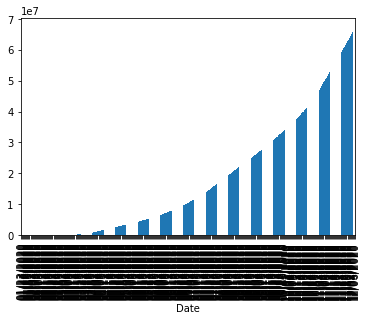

In [64]:
confirmed.plot(kind='bar', x='Date', y='confirmed')

<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

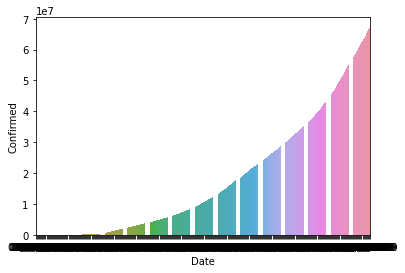

In [76]:
# Seaborn
sns.barplot(x=confirmed['Date'], y=confirmed['Confirmed'])

In [113]:
# using iplot (in this project) gives us better representation of data to analyse
confirmed.iplot(kind='bar', x='Date', y='Confirmed')

KeyError: "None of ['Date'] are in the columns"

<AxesSubplot:xlabel='Date'>

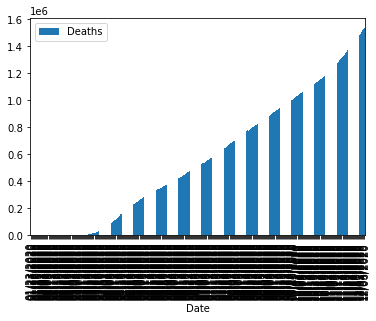

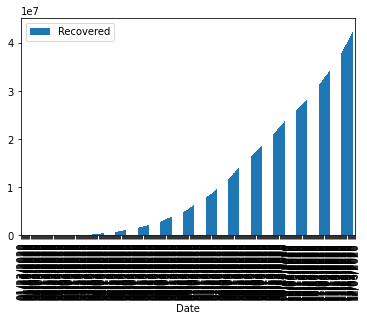

In [34]:
deaths.plot(kind='bar', x='Date', y='Deaths')
recovered.plot(kind='bar', x='Date', y='Recovered')

In [40]:
deaths.iplot(kind='bar', x='Date', y='Deaths')
recovered.iplot(kind='bar', x='Date', y='Recovered')

# Prediction

In [19]:
from fbprophet import Prophet

In [20]:
df.head()

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


# Case Count Prediction

In [27]:
# date=ds(datestamp, column=y)
# fbprophet takes datestamp in YYYY-MM-DD or YYYY-MM-DD HH:MM:SS

In [73]:
confirmed.columns=['ds', 'y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2020-01-22,555.00
1,2020-01-23,653.00
2,2020-01-24,941.00
3,2020-01-25,1438.00
4,2020-01-26,2118.00
5,2020-01-27,2927.00
6,2020-01-28,5578.00
7,2020-01-29,6165.00
8,2020-01-30,8235.00
9,2020-01-31,9925.00


In [74]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
# here we are predicting the cases for next 100 days to wherever the dataset ends.
future_pred = model.make_future_dataframe(periods=100)
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [76]:
future_confirmed = model.predict(future_pred)
future_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-43632.78,-966678.61,893340.27,-43632.78,-43632.78,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,0.00,0.00,0.00,-63006.01
1,2020-01-23,-39804.26,-977335.57,786749.37,-39804.26,-39804.26,4472.16,4472.16,4472.16,4472.16,4472.16,4472.16,0.00,0.00,0.00,-35332.10
2,2020-01-24,-35975.74,-859660.49,932612.53,-35975.74,-35975.74,36869.40,36869.40,36869.40,36869.40,36869.40,36869.40,0.00,0.00,0.00,893.66
3,2020-01-25,-32147.22,-926512.99,829347.49,-32147.22,-32147.22,42297.29,42297.29,42297.29,42297.29,42297.29,42297.29,0.00,0.00,0.00,10150.06
4,2020-01-26,-28318.70,-917730.85,961518.73,-28318.70,-28318.70,16366.25,16366.25,16366.25,16366.25,16366.25,16366.25,0.00,0.00,0.00,-11952.45
5,2020-01-27,-24490.18,-980204.07,833372.30,-24490.18,-24490.18,-39479.84,-39479.84,-39479.84,-39479.84,-39479.84,-39479.84,0.00,0.00,0.00,-63970.02
6,2020-01-28,-20661.66,-867562.77,881794.33,-20661.66,-20661.66,-41152.03,-41152.03,-41152.03,-41152.03,-41152.03,-41152.03,0.00,0.00,0.00,-61813.69
7,2020-01-29,-16833.14,-929291.49,954994.61,-16833.14,-16833.14,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,-19373.22,0.00,0.00,0.00,-36206.37
8,2020-01-30,-13004.62,-912385.93,892299.33,-13004.62,-13004.62,4472.16,4472.16,4472.16,4472.16,4472.16,4472.16,0.00,0.00,0.00,-8532.46
9,2020-01-31,-9176.10,-904995.74,922271.74,-9176.10,-9176.10,36869.40,36869.40,36869.40,36869.40,36869.40,36869.40,0.00,0.00,0.00,27693.30


In [77]:
# we just needs ds, yhat, yhat_lower, yhat_upper in this project
# yhat is the most probable prediction, & yhat_lower and yhat_upper are the max min predictions 
future_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
410,2021-03-07,110926861.05,100829540.86,120516377.43
411,2021-03-08,111371308.63,100901856.16,121079196.45
412,2021-03-09,111869930.12,101048408.94,121945661.15
413,2021-03-10,112392002.60,101609180.44,122730247.46
414,2021-03-11,112916141.67,101878971.94,123158957.13
415,2021-03-12,113448832.58,102588108.12,123951002.14
416,2021-03-13,113954554.15,103317411.97,124454913.06
417,2021-03-14,114428916.79,103115427.84,125291501.61
418,2021-03-15,114873364.38,103248731.06,125778727.30
419,2021-03-16,115371985.86,103412809.90,126400737.25


In [78]:
confirmed.tail()

,ds,y
315,2020-12-02,64530517.00
316,2020-12-03,65221040.00
317,2020-12-04,65899441.00
318,2020-12-05,66540034.00
319,2020-12-06,67073728.00


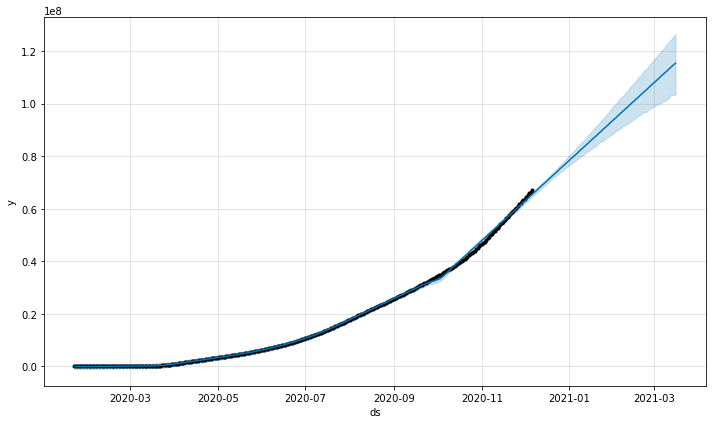

In [79]:
future_confirmed_plot = model.plot(future_confirmed)

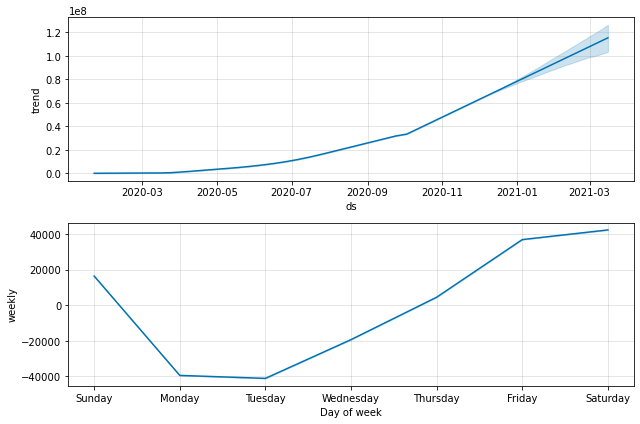

In [80]:
future_confirmed_plot_components = model.plot_components(future_confirmed)

# Deaths Prediction

In [81]:
deaths.columns=['ds', 'y']
deaths['ds']=pd.to_datetime(deaths['ds'])
deaths

,ds,y
0,2020-01-22,17.00
1,2020-01-23,18.00
2,2020-01-24,26.00
3,2020-01-25,42.00
4,2020-01-26,56.00
5,2020-01-27,82.00
6,2020-01-28,131.00
7,2020-01-29,133.00
8,2020-01-30,171.00
9,2020-01-31,213.00


In [89]:
death_model = Prophet(interval_width=0.95)
death_model.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
future_pred2 = death_model.make_future_dataframe(periods=100)
future_pred2.tail(10)

,ds
410,2021-03-07
411,2021-03-08
412,2021-03-09
413,2021-03-10
414,2021-03-11
415,2021-03-12
416,2021-03-13
417,2021-03-14
418,2021-03-15
419,2021-03-16


In [103]:
future_deaths = death_model.predict(future_pred2)

In [104]:
future_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-1324.48,-20006.37,16631.58
1,2020-01-23,-367.07,-19148.53,19129.03
2,2020-01-24,463.12,-17916.03,18609.63
3,2020-01-25,435.53,-18546.52,18964.59
4,2020-01-26,-747.74,-19722.29,17820.18
5,2020-01-27,-2409.99,-20959.44,17265.13
6,2020-01-28,-1605.99,-19806.10,18034.94
7,2020-01-29,-547.79,-19952.52,19292.95
8,2020-01-30,409.63,-18723.38,19030.03
9,2020-01-31,1239.81,-17252.95,19613.01


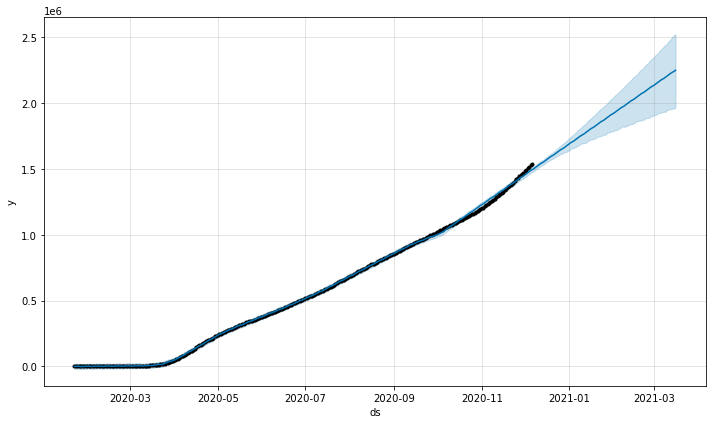

In [105]:
future_deaths_plot = death_model.plot(future_deaths)

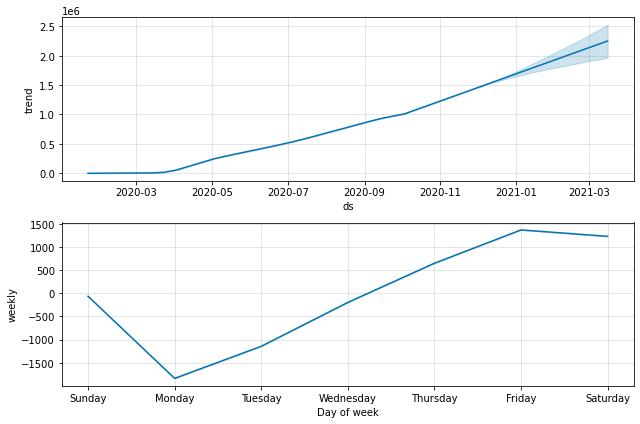

In [106]:
future_deaths_plot_components = death_model.plot_components(future_deaths)

# Recovered Cases Count Prediction

In [100]:
recovered.columns=['ds', 'y']
recovered['ds']=pd.to_datetime(recovered['ds'])
recovered

,ds,y
0,2020-01-22,28.00
1,2020-01-23,30.00
2,2020-01-24,36.00
3,2020-01-25,39.00
4,2020-01-26,52.00
5,2020-01-27,61.00
6,2020-01-28,107.00
7,2020-01-29,126.00
8,2020-01-30,143.00
9,2020-01-31,222.00


In [101]:
recovery_model = Prophet(interval_width=0.95)
recovery_model.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [107]:
future_pred3 = recovery_model.make_future_dataframe(periods=100)
future_pred3.tail(10)

,ds
410,2021-03-07
411,2021-03-08
412,2021-03-09
413,2021-03-10
414,2021-03-11
415,2021-03-12
416,2021-03-13
417,2021-03-14
418,2021-03-15
419,2021-03-16


In [109]:
future_recovery = recovery_model.predict(future_pred3)

In [110]:
future_recovery[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-37064.46,-663973.35,533874.79
1,2020-01-23,-32286.54,-702305.72,586542.36
2,2020-01-24,-41337.71,-679292.41,544559.25
3,2020-01-25,-15290.70,-587388.36,591810.59
4,2020-01-26,-26570.15,-615074.27,585547.08
5,2020-01-27,-59048.59,-656289.69,568770.19
6,2020-01-28,-41415.27,-635243.35,546418.82
7,2020-01-29,-20125.77,-593222.91,606226.50
8,2020-01-30,-15347.86,-611719.00,554330.34
9,2020-01-31,-24399.02,-638242.81,584294.09


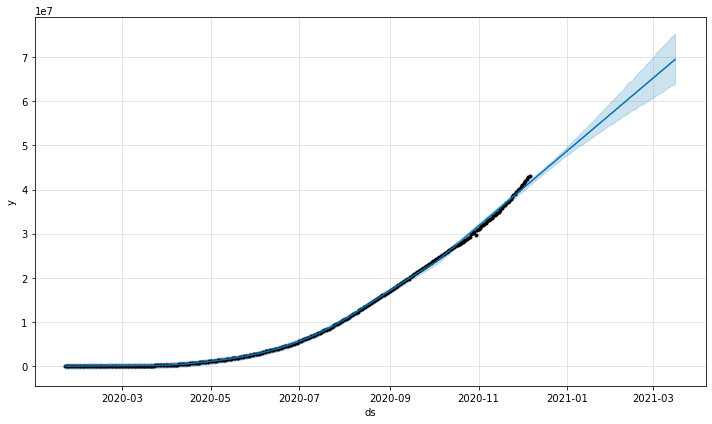

In [111]:
future_recovery_plot = recovery_model.plot(future_recovery)

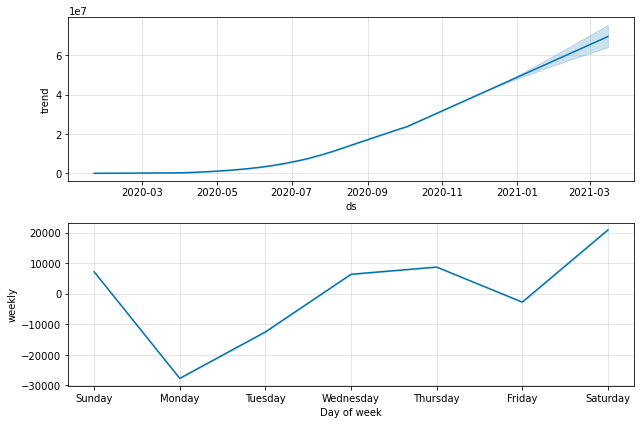

In [112]:
future_recovery_plot_components = recovery_model.plot_components(future_recovery)